# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
    ### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)

In [4]:
import pandas as pd

ds = pd.read_excel('geo.xlsx')

ds.head()

,Unnamed: 0,x,y,comment_class
0,0,37.612416,55.777454,-1
1,1,37.612416,55.777454,-1
2,2,37.603298,55.742108,-1
3,3,37.558526,55.728758,-1
4,4,37.566431,55.731794,-1


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

ds[['x', 'y']] = scaler.fit_transform(ds[['x', 'y']])
ds = ds.drop(ds.columns[[0]], axis='columns')
ds.head()

,x,y,comment_class
0,0.367919,0.159553,-1
1,0.367919,0.159553,-1
2,0.293178,-0.348131,-1
3,-0.073819,-0.539880,-1
4,-0.009022,-0.496273,-1


In [64]:
Xcoord = ds[['x','y']]

Xcoord

,x,y
0,0.367919,0.159553
1,0.367919,0.159553
2,0.293178,-0.348131
3,-0.073819,-0.539880
4,-0.009022,-0.496273
...,...,...
108801,-0.926294,0.373235
108802,-1.501751,1.906326
108803,-1.200584,1.183682
108804,-0.975632,0.383778


In [87]:
from sklearn.cluster import KMeans, DBSCAN

classifier = KMeans()

In [73]:
clusters = classifier.fit_predict(Xcoord)

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = (12, 9)

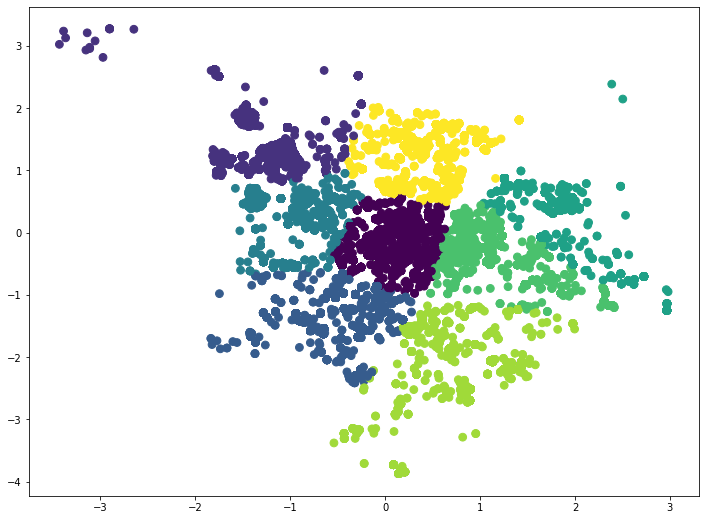

In [80]:
plt.scatter(ds['x'], ds['y'], c = clusters, s=60)

* аналогично исследовать скопления голосов за и против отдельно

In [78]:
Xpositive = ds[ds['comment_class'] == 1]
Xnegative = ds[ds['comment_class'] == -1]

In [79]:
clusterspos = classifier.fit_predict(Xpositive)
clustersneg = classifier.fit_predict(Xnegative)

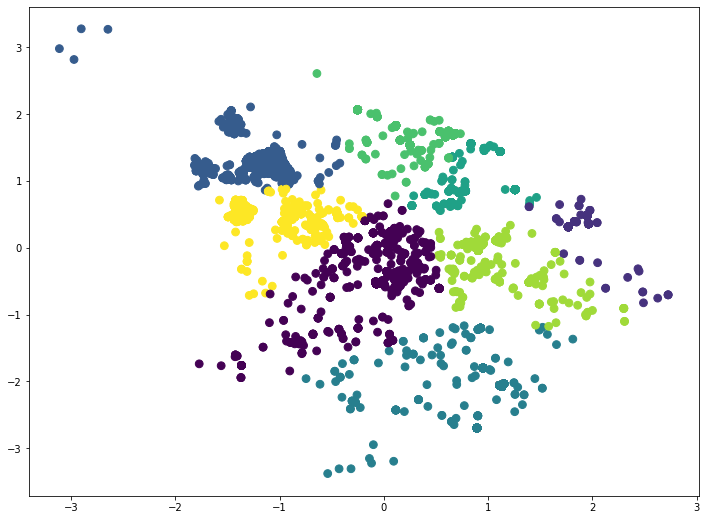

In [82]:
plt.scatter(Xpositive['x'], Xpositive['y'], c = clusterspos, s=60)

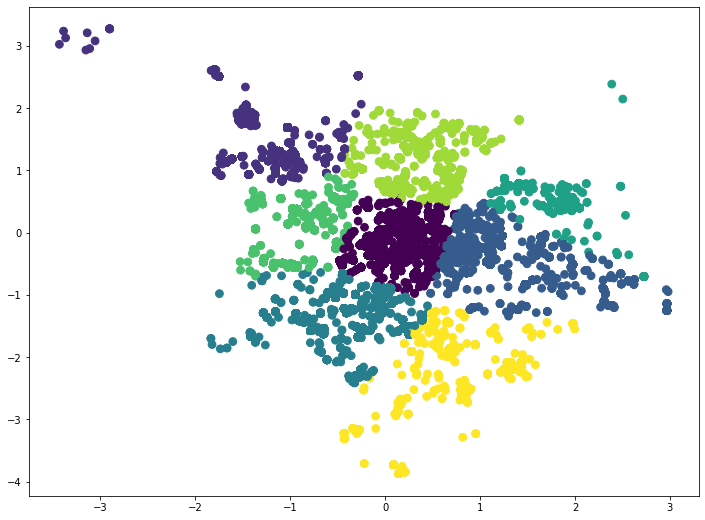

In [83]:
plt.scatter(Xnegative['x'], Xnegative['y'], c = clustersneg, s=60)

* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

In [84]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(Xcoord, )
    k_inertia.append(clf_kmeans.inertia_)

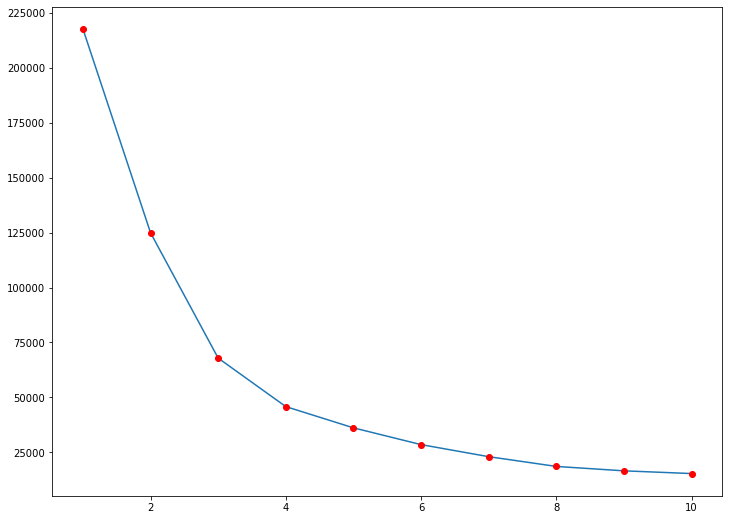

In [85]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

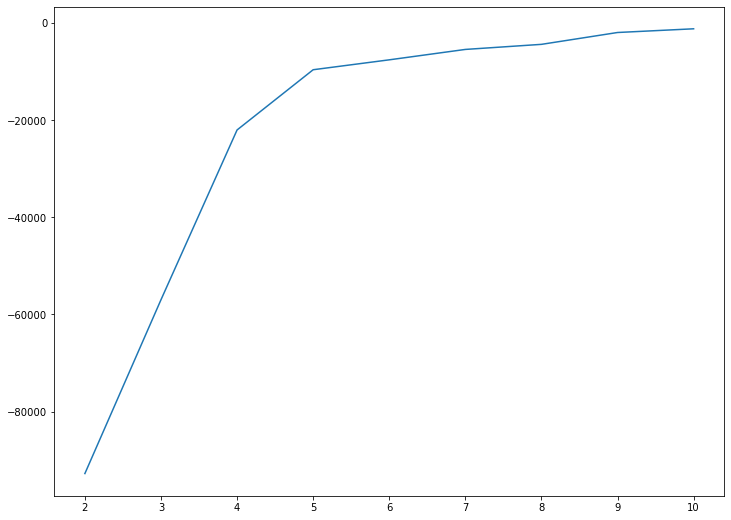

In [86]:
diff = np.diff(k_inertia)
plt.plot(ks[1:], diff)

Видно, что оптимальное число кластеров - 4 или 5

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [119]:
classifier = DBSCAN(eps = 0.1)
clusters = classifier.fit_predict(Xcoord)

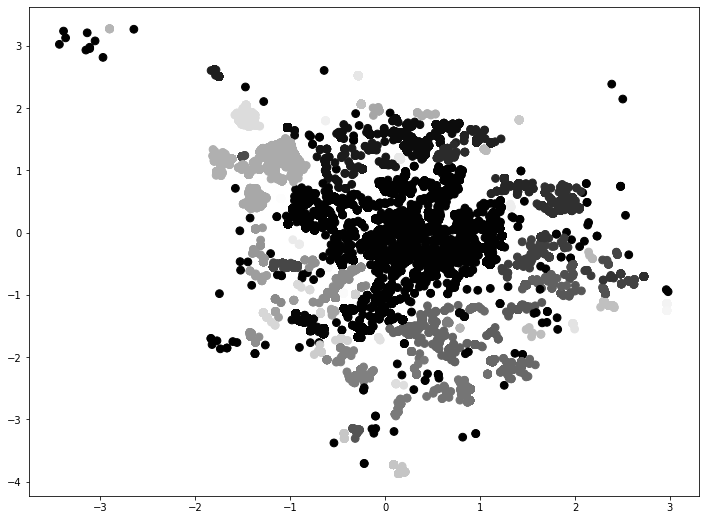

In [121]:
plt.scatter(ds['x'], ds['y'], cmap='gray', c = clusters, s=60)

Вроде удалось подсветить плотные районы, но неясно, почему самый плотный центральный район и шумовые точки оказались одного цвета.